[5.09355260e-01 1.56195696e-33 8.07714813e-02]


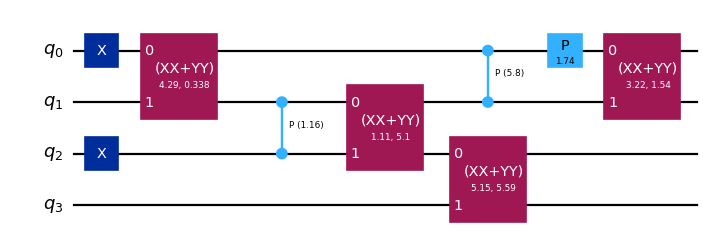

In [1]:
import numpy as np
from qiskit import QuantumCircuit
from qiskit.circuit.library import XXPlusYYGate

from extraferm import outcome_probabilities

# Create a small circuit
seed = 123
rng = np.random.default_rng(seed=seed)
angles = rng.uniform(0, 2 * np.pi, size=12)
qc = QuantumCircuit(4)
qc.x([0, 2])
qc.append(XXPlusYYGate(theta=angles[0], beta=angles[1]), [0, 1])
qc.cp(theta=angles[3], control_qubit=1, target_qubit=2)
qc.append(XXPlusYYGate(theta=angles[4], beta=angles[5]), [1, 2])
qc.cp(theta=angles[6], control_qubit=0, target_qubit=1)
qc.p(theta=angles[7], qubit=0)
qc.append(XXPlusYYGate(theta=angles[8], beta=angles[9]), [2, 3])
qc.append(XXPlusYYGate(theta=angles[10], beta=angles[11]), [0, 1])

# Estimate a few bitstring probabilitites
bitstrings = [0b0101, 0b1100, 0b0011]
probs = outcome_probabilities(
    circuit=qc, outcome_states=bitstrings, trajectory_count=100_000, seed=seed
)

# Show results
print(probs)
qc.draw("mpl", scale=0.8, fold=-1)